# Import Packages

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

In [117]:
np.random.seed(42)

# Import Data

In [118]:
subset0 = pd.read_csv("data/maintenance_subset_0.csv")
subset1 = pd.read_csv("data/maintenance_subset_1.csv")
subset2 = pd.read_csv("data/maintenance_subset_2.csv")
subset3 = pd.read_csv("data/maintenance_subset_3.csv")
subset4 = pd.read_csv("data/maintenance_subset_4.csv")
subset5 = pd.read_csv("data/maintenance_subset_5.csv")
subset6 = pd.read_csv("data/maintenance_subset_6.csv")
subset7 = pd.read_csv("data/maintenance_subset_7.csv")
subset8 = pd.read_csv("data/maintenance_subset_8.csv")
subset9 = pd.read_csv("data/maintenance_subset_9.csv")
subset10 = pd.read_csv("data/maintenance_subset_10.csv")
subset11 = pd.read_csv("data/maintenance_subset_11.csv")
subset12 = pd.read_csv("data/maintenance_subset_12.csv")

features = ["order_frequency", "total_price", "recency", "review_score"]

subsets = [
    subset1[features],
    subset2[features],
    subset3[features],
    subset4[features],
    subset5[features],
    subset6[features],
    subset7[features],
    subset8[features],
    subset9[features],
    subset10[features],
    subset11[features],
    subset12[features],
]

In [119]:
ari_scores = []

In [120]:
baseline_scaler = StandardScaler()
baseline_scaler = baseline_scaler.fit(subset0[features])
baseline = baseline_scaler.transform(subset0[features])

baseline_model = KMeans(n_clusters=5, random_state=42, n_init="auto")
baseline_model.fit(baseline)

ari_scores.append(
    [0, adjusted_rand_score(baseline_model.labels_, baseline_model.predict(baseline))]
)

In [121]:
days = 30
for subset in subsets:
    baseline_model_clusters = baseline_model.predict(baseline_scaler.transform(subset))

    subset_model = KMeans(n_clusters=5, random_state=42, n_init="auto")
    subset_scaler = StandardScaler()

    updated_model_clusters = subset_model.fit(
        subset_scaler.fit_transform(subset)
    ).labels_

    ari_scores.append(
        [days, adjusted_rand_score(baseline_model_clusters, updated_model_clusters)]
    )

    days += 30

In [122]:
ari_scores = pd.DataFrame(
    ari_scores, columns=["time", "ARI"]).set_index("time")

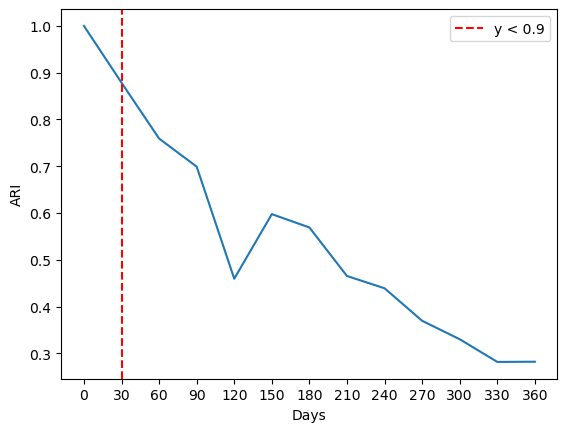

In [124]:
plt.plot(ari_scores["ARI"])
plt.xlabel("Days")
plt.ylabel("ARI")
plt.xticks(np.arange(0, ari_scores.index.max() + 1, 30))

threshold = 0.90
x_threshold = ari_scores.index[np.where(
    np.array(ari_scores["ARI"]) < threshold)[0][0]]
plt.axvline(x=x_threshold, color="red",
            linestyle="--", label=f"y < {threshold}")
plt.legend()

plt.show()

The ARI score drops under .9 after 30 days. 

It is therefore recommended to update the segmentation once a month. 